In [54]:
import pandas as pd

In [56]:
# Read sales data
sales = pd.read_csv("processed_data/agg_sales.csv", header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data/agg_sales.csv'

In [48]:
# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

In [49]:
# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.line(x="sales_date")

,revenue_standard,sales_date,revenue_premium
0,150,2022-01-01,200
1,190,2022-01-02,270
2,590,2022-01-03,370


<Axes: xlabel='sales_date'>

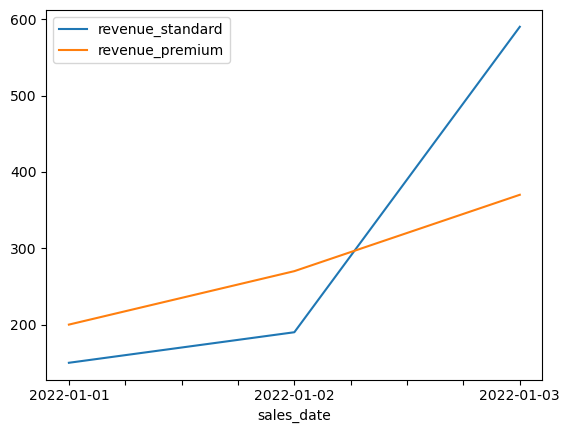